<a href="https://colab.research.google.com/github/Lily-R26/Exercice-detection-de-Badbuzz/blob/main/RENAISON_Alicia_Mod%C3%A8le_DeepLearning_Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----
### Exercice 1 : Entrainement d'un MLP sur le jeu de données `Bank marketing`

Créez un nouveau notebook intitulé `Modèle DeepLearning - Bank marketing` puis répondez aux questions suivantes. Chaque partie doit être séparée par un titre de niveau 2 et doit être accompagnée d'un commentaire expliquant votre démarche.

1. Complétez le code suivant en renseignant le chemin vers le jeu de données `Bank marketing` puis exécutez le code afin d'obtenir les variables d'entrainement et de test.

#COMMENTAIRES - 1
Tout d'abord nous importons les bibliothèques nécessaires.
Ensuite on initialise une fonction qui affiche un graphique à partir des données "d'Accuraty".


On importe ensuite, le jeu de données "train.csv" et on place dans deux variables X et y les features utiles.

Ce code utilise LabelEncoder de la bibliothèque scikit-learn pour transformer les données catégorielles en valeurs numériques. Cela permet une version numérique de chaque colonne catégorielle en remplaçant chaque catégorie par un entier unique.


Pour terminer, nous appelons StandardScaler de la bibliothèque scikit-learn pour remplacer les valeurs de X par les valeurs traitées. Et ensuite faire la préparation pour l'entraînement.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


file_path = 'train.csv'

# Import du jeu de données
df = pd.read_csv(file_path)

X = df.drop(['ID', 'contact', 'month', 'day', 'y'], axis=1)
y = df['y']

# Encodage des variables catégorielles
le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['poutcome'] = le.fit_transform(X['poutcome'])

y = le.fit_transform(y)

# Normalisation des données
sc = StandardScaler()
X = sc.fit_transform(X)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Créez un réseau de neuronnes profond avec 3 couches cachées de 10 neurones chacune et une couche de sortie de 1 neurone. Utilisez la fonction d'activation `relu` pour les couches cachées et `sigmoid` pour la couche de sortie. 

#COMMENTAIRES - 2

Ce code définit une classe 'MultiLayerPerceptron' qui est un modèle de réseau de neurones à trois couches cachées de 10 neurones chacune et une couche de sortie de 1 neurone. La fonction d'activation "relu" est utilisée pour les couches cachées et "sigmoid" pour la couche de sortie. Les paramètres d'entrée sont la dimension de la couche d'entrée et la dimension de la couche de sortie.



3. Compilez le modèle en utilisant l'optimiseur `adam` et la fonction de perte `binary_crossentropy`.

#COMMENTAIRES - 3

Nous avons modifié dans les ligne de code "model.compil", les valeurs "d'optimizer" en "adam" et de "loss" en "binary_crossentropy".

In [ ]:
#EXERCICES 2 & 3

import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, input_dim=input_dim, activation='relu'))

        # Deuxième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        # Troisième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    
model = MultiLayerPerceptron(12, 1).model


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                130       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


4. Entraînez le modèle en utilisant 10 epochs et une taille de batch de 32 et stockez l'historique de l'entraînement dans la variable `history`.  

Utilisez la méthode fit du modèle : `fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=5, batch_size=10, verbose=1)`

#COMMENTAIRES - 4

Nous effectuons l'entraînement du modèle 10 fois (epoch=10) avec 32 exemples (batch_size=32).

In [ ]:
# Entrainement du modèle

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=32, verbose=1)

Epoch 1/10
322/322 [==============================] - 2s 3ms/step - loss: 0.6237 - accuracy: 0.6571 - val_loss: 0.5708 - val_accuracy: 0.7044
Epoch 2/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5773 - accuracy: 0.6948 - val_loss: 0.5572 - val_accuracy: 0.7234
Epoch 3/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.7212 - val_loss: 0.5504 - val_accuracy: 0.7389
Epoch 4/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5561 - accuracy: 0.7339 - val_loss: 0.5442 - val_accuracy: 0.7490
Epoch 5/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5508 - accuracy: 0.7389 - val_loss: 0.5408 - val_accuracy: 0.7498
Epoch 6/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.7401 - val_loss: 0.5369 - val_accuracy: 0.7498
Epoch 7/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.7414 - val_loss: 0.5366 - val_accuracy: 0.7541
Epoch 

5. Affichez l'historique de l'entraînement en utilisant la fonction `plot_history`.

#COMMENTAIRES - 5

Nous obtenons ci-dessous les résultats concernant les données du modèle original, ainsi que ceux appliqués au df que nous avons renommé plus tôt 'history'.

In [ ]:
history.history

{'loss': [0.6237297654151917,
  0.5773335695266724,
  0.5650153160095215,
  0.5561286807060242,
  0.5507826805114746,
  0.546210527420044,
  0.5430489182472229,
  0.540121853351593,
  0.5387908816337585,
  0.5370327234268188],
 'accuracy': [0.6570512652397156,
  0.6948329210281372,
  0.7211538553237915,
  0.7338772416114807,
  0.7389277219772339,
  0.7400932312011719,
  0.7413558959960938,
  0.7441725134849548,
  0.7473776340484619,
  0.7483488917350769],
 'val_loss': [0.5708498358726501,
  0.5571913719177246,
  0.5504076480865479,
  0.5441877245903015,
  0.5407683253288269,
  0.5369134545326233,
  0.5365521907806396,
  0.5350209474563599,
  0.5293100476264954,
  0.5279040932655334],
 'val_accuracy': [0.7043511867523193,
  0.7233877182006836,
  0.7389277219772339,
  0.749028742313385,
  0.749805748462677,
  0.749805748462677,
  0.754079282283783,
  0.7564102411270142,
  0.7579642534255981,
  0.7579642534255981]}

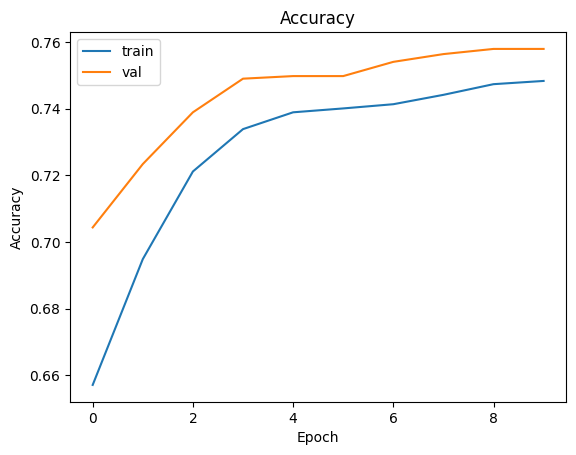

In [ ]:
plot_history(history)

6. Obtenez les prédictions du modèle sur les données de test avec la méthode `predict` et calculez l'accuracy du modèle avec la fonction `accuracy_score` de la librairie `sklearn.metrics`. Utilisez une liste compréhension pour convertir les prédictions en 0 ou 1 avec un seuil de 0.5.

#COMMENTAIRES - 6

On utilise la méthode predict pour pouvoir obtenir la valeur de l'accuracy converti en 0 et 1, grâce à la fonction accuracy_score de la bibliothèque sklearn.metrics.

In [ ]:
from sklearn.metrics import accuracy_score

# Obtention des prédictions du modèle sur les données de test
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calcul de l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)

# Affichage de l'accuracy
print("Accuracy du modèle : {:.2%}".format(accuracy))


81/81 [==============================] - 0s 2ms/step
Accuracy du modèle : 75.80%


7. Affichez les poids du modèle avec l'attribut `get_weights` du modèle. Comment est-ce que les poids sont stockés ?

#COMMENTAIRES - 7

Les poids sont stockés sous forme de liste. La longueur de cette dernière est égale à 8 neuronnes (sans l'entrée ni la sortie). 
L'entrée est composée des features.
En totalité, les 10 couches sont composées de deux parties chacunes ; les "weights" et les "biais".
A chaque couche, les neuronnes sont appliqués aux prochains, sous la forme d'un "arbre", jusqu'à arriver au résultat (la sortie).



In [ ]:
len(model.get_weights())

8

In [ ]:
weights = model.get_weights()
print(weights)

[array([[ 0.12977146,  0.10837849,  0.1471956 , -0.06356867, -0.47540078,
        -0.05357413,  0.5271011 , -0.8395877 ,  0.08060801,  0.7833597 ],
       [ 0.15629454, -0.16375689,  0.23034786,  0.13595444, -0.27593613,
        -0.50765514, -0.5275276 , -0.16730207, -0.5238075 , -0.19529992],
       [ 0.10799973,  0.11630517, -0.14971349,  0.11581119,  0.53582853,
         0.11271881, -0.05044276,  0.55485916, -0.28530398,  0.11354236],
       [-0.13788782,  0.4024542 , -0.45957336,  0.06386692,  0.07831421,
         0.21774498, -0.12307113,  0.11367537,  0.3050488 , -0.05167351],
       [-0.6499804 , -0.49372748,  0.14291407,  0.19969879,  0.02806553,
        -0.08949059, -0.16942261,  0.11933741,  0.6994698 ,  0.42996126],
       [-0.5715261 , -0.07586382, -0.28990144,  0.12029689,  0.06081631,
        -0.28700122, -0.21490616, -0.139648  , -0.08158585, -0.05784628],
       [ 0.39299902, -0.46578562,  0.14556658, -0.15163286, -0.02918336,
        -0.10026401,  0.5292974 , -0.5800798

8. Changez les hyperparamètres du modèle et observez l'impact sur l'accuracy du modèle.
- fonction d'activation, 
- nombre de couches, 
- nombre de neurones, 
- optimiseur, 
- fonction de perte, 
- nombre d'epochs, 
- taille de batch

Au moins 3 configurations différentes doivent être testées.
Quel est le meilleur modèle que vous avez obtenu ? 

#COMMENTAIRES - 8

1 - Changement du nombre de neurones, l'accuracy a chuté de 16% environ, au départ il était de 76,61%.

2 - Changement de l'optimiseur, l'accuracy a chuté de 14% environ par rapport à celui de départ.

3 - Changement du nombre de couches, l'accuracy a chute de 48% environ par rapport à celui de départ.

En conclusion, plus on augmente le nombre de couche plus l'accuracy baisse(surrentraînement du modèle). Adagrad est moins performant que l'optimiseur Adam.

In [ ]:
#Nombre de neurones

import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 26 neurones
        self.model.add(tf.keras.layers.Dense(26, input_dim=input_dim, activation='relu'))

        # Deuxième couche cachée de 26 neurones
        self.model.add(tf.keras.layers.Dense(26, activation='relu'))

        # Troisième couche cachée de 26 neurones
        self.model.add(tf.keras.layers.Dense(26, activation='relu'))

        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    
model_1 = MultiLayerPerceptron(12, 1).model


model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary()


y_pred_1 = (model_1.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_1)
print("Accuracy du modèle : {:.2%}".format(accuracy))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 26)                338       
                                                                 
 dense_29 (Dense)            (None, 26)                702       
                                                                 
 dense_30 (Dense)            (None, 26)                702       
                                                                 
 dense_31 (Dense)            (None, 1)                 27        
                                                                 
Total params: 1,769
Trainable params: 1,769
Non-trainable params: 0
_________________________________________________________________
81/81 [==============================] - 0s 1ms/step
Accuracy du modèle : 32.17%


In [ ]:
#Optimiseur

import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, input_dim=input_dim, activation='relu'))

        # Deuxième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        # Troisième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    
model_2 = MultiLayerPerceptron(12, 1).model


model_2.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

y_pred_2 = (model_2.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy du modèle : {:.2%}".format(accuracy))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                130       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
81/81 [==============================] - 0s 1ms/step
Accuracy du modèle : 53.42%


In [ ]:
#Nombre de couches

import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, input_dim=input_dim, activation='relu'))

        # Deuxième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        # Troisième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

         # Quatrième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

         # Cinquième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    
model_3 = MultiLayerPerceptron(12, 1).model


model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

y_pred_3 = (model_3.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_3)
print("Accuracy du modèle : {:.2%}".format(accuracy))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                130       
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable

9. Sauvegardez le modèle en utilisant la méthode `save` du modèle. Chargez le modèle en utilisant la méthode `load_model` de la librairie `tensorflow.keras.models`.

In [ ]:
model_1.save('model_1')

In [ ]:
model__1 = load_model('model_1')

In [ ]:
model__1.predict(X_test)

81/81 [==============================] - 0s 1ms/step


array([[0.5725295 ],
       [0.52606374],
       [0.6207896 ],
       ...,
       [0.4725686 ],
       [0.55849177],
       [0.5011364 ]], dtype=float32)

In [ ]:
model.save('Model')
model= load_model('Model')
model.predict(X_test)

81/81 [==============================] - 0s 1ms/step


array([[0.15783587],
       [0.7544691 ],
       [0.7956704 ],
       ...,
       [0.66922814],
       [0.19328482],
       [0.3546401 ]], dtype=float32)

#COMMENTAIRES - 9

10. Publiez votre projet sur GitHub et placez le lien dans dans le fichier [suivant](https://docs.google.com/spreadsheets/d/1mnS5XL4pJNmQNclndP2LZPCELOi1OmBKoW3803xyK8c/edit?usp=sharing).

**Bonus :** Déposez le `Tp 6 : Introduction au Deep Learning` dans votre dossier Github avec vos noms et prénoms dans le nom du fichier.